In [1]:
import sys

from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rich import print
import seaborn as sns

sns.set_theme(
	# context="talk",
	style="ticks",
	font="serif",
	palette="colorblind",
	color_codes=True,
)

In [2]:
#https://stackoverflow.com/questions/37470734/matplotlib-giving-error-overflowerror-in-draw-path-exceeded-cell-block-limit
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [25]:
root_file_name = "data_release/PIP_PIPPIN_ROMAN_TRANS_SUPERNOVA/PIP_PIPPIN_ROMAN_TRANS_SUaa107_NONIaMODEL1-"

In [56]:
cid, cpu_number = "136932", 3 #97 precentile - wide, z=0.3
cid, cpu_number = "354416", 8 #98 precentile - wide, z=0.3



In [26]:
spec_hdus = []

for i in range(1, 11):
    spec_file = root_file_name + f"00{i:02}_SPEC.FITS.gz"
    print(spec_file)
    spec_hdus.append(fits.open(spec_file))

data_release/PIP_PIPPIN_ROMAN_TRANS_SUPERNOVA/PIP_PIPPIN_ROMAN_TRANS_SUaa107_NONIaMODEL1-0001_SPEC.FITS.gz

data_release/PIP_PIPPIN_ROMAN_TRANS_SUPERNOVA/PIP_PIPPIN_ROMAN_TRANS_SUaa107_NONIaMODEL1-0002_SPEC.FITS.gz

data_release/PIP_PIPPIN_ROMAN_TRANS_SUPERNOVA/PIP_PIPPIN_ROMAN_TRANS_SUaa107_NONIaMODEL1-0003_SPEC.FITS.gz

data_release/PIP_PIPPIN_ROMAN_TRANS_SUPERNOVA/PIP_PIPPIN_ROMAN_TRANS_SUaa107_NONIaMODEL1-0004_SPEC.FITS.gz

data_release/PIP_PIPPIN_ROMAN_TRANS_SUPERNOVA/PIP_PIPPIN_ROMAN_TRANS_SUaa107_NONIaMODEL1-0005_SPEC.FITS.gz

data_release/PIP_PIPPIN_ROMAN_TRANS_SUPERNOVA/PIP_PIPPIN_ROMAN_TRANS_SUaa107_NONIaMODEL1-0006_SPEC.FITS.gz

data_release/PIP_PIPPIN_ROMAN_TRANS_SUPERNOVA/PIP_PIPPIN_ROMAN_TRANS_SUaa107_NONIaMODEL1-0007_SPEC.FITS.gz

data_release/PIP_PIPPIN_ROMAN_TRANS_SUPERNOVA/PIP_PIPPIN_ROMAN_TRANS_SUaa107_NONIaMODEL1-0008_SPEC.FITS.gz

data_release/PIP_PIPPIN_ROMAN_TRANS_SUPERNOVA/PIP_PIPPIN_ROMAN_TRANS_SUaa107_NONIaMODEL1-0009_SPEC.FITS.gz

data_release/PIP_PIPPIN_ROMAN_TRANS_SUPERNOVA/PIP_PIPPIN_ROMAN_TRANS_SUaa107_NONIaMODEL1-0010_SPEC.FITS.gz

In [57]:
mask_median_snia = spec_hdus[cpu_number][1].data['SNID'] == cid  # checked with any, its in file 1
np.any(mask_median_snia)

True

In [58]:
head_file = root_file_name + f"00{cpu_number+1:02}_HEAD.FITS.gz"
print(head_file)
head_hdul = fits.open(head_file)
# head_hdul[1].header
target = Table(head_hdul[1].data[head_hdul[1].data["SNID"] == cid])
target

data_release/PIP_PIPPIN_ROMAN_TRANS_SUPERNOVA/PIP_PIPPIN_ROMAN_TRANS_SUaa107_NONIaMODEL1-0009_HEAD.FITS.gz

SNID,IAUC,FAKE,RA,DEC,PIXSIZE,NXPIX,NYPIX,SNTYPE,NOBS,PTROBS_MIN,PTROBS_MAX,MWEBV,MWEBV_ERR,REDSHIFT_HELIO,REDSHIFT_HELIO_ERR,REDSHIFT_FINAL,REDSHIFT_FINAL_ERR,VPEC,VPEC_ERR,HOSTGAL_NMATCH,HOSTGAL_NMATCH2,HOSTGAL_OBJID,HOSTGAL_FLAG,HOSTGAL_PHOTOZ,HOSTGAL_PHOTOZ_ERR,HOSTGAL_SPECZ,HOSTGAL_SPECZ_ERR,HOSTGAL_RA,HOSTGAL_DEC,HOSTGAL_SNSEP,HOSTGAL_DDLR,HOSTGAL_CONFUSION,HOSTGAL_LOGMASS,HOSTGAL_LOGMASS_ERR,HOSTGAL_LOGSFR,HOSTGAL_LOGSFR_ERR,HOSTGAL_LOGsSFR,HOSTGAL_LOGsSFR_ERR,HOSTGAL_COLOR,HOSTGAL_COLOR_ERR,HOSTGAL_ELLIPTICITY,HOSTGAL_OBJID2,HOSTGAL_SQRADIUS,HOSTGAL_OBJID_UNIQUE,HOSTGAL_MAG_Y,HOSTGAL_MAG_J,HOSTGAL_MAG_H,HOSTGAL_MAG_F,HOSTGAL_MAG_Z,HOSTGAL_MAG_R,HOSTGAL_MAGERR_Y,HOSTGAL_MAGERR_J,HOSTGAL_MAGERR_H,HOSTGAL_MAGERR_F,HOSTGAL_MAGERR_Z,HOSTGAL_MAGERR_R,HOSTGAL2_OBJID,HOSTGAL2_FLAG,HOSTGAL2_PHOTOZ,HOSTGAL2_PHOTOZ_ERR,HOSTGAL2_SPECZ,HOSTGAL2_SPECZ_ERR,HOSTGAL2_RA,HOSTGAL2_DEC,HOSTGAL2_SNSEP,HOSTGAL2_DDLR,HOSTGAL2_LOGMASS,HOSTGAL2_LOGMASS_ERR,HOSTGAL2_LOGSFR,HOSTGAL2_LOGSFR_ERR,HOSTGAL2_LOGsSFR,HOSTGAL2_LOGsSFR_ERR,HOSTGAL2_COLOR,HOSTGAL2_COLOR_ERR,HOSTGAL2_ELLIPTICITY,HOSTGAL2_OBJID2,HOSTGAL2_SQRADIUS,HOSTGAL2_OBJID_UNIQUE,HOSTGAL2_MAG_Y,HOSTGAL2_MAG_J,HOSTGAL2_MAG_H,HOSTGAL2_MAG_F,HOSTGAL2_MAG_Z,HOSTGAL2_MAG_R,HOSTGAL2_MAGERR_Y,HOSTGAL2_MAGERR_J,HOSTGAL2_MAGERR_H,HOSTGAL2_MAGERR_F,HOSTGAL2_MAGERR_Z,HOSTGAL2_MAGERR_R,HOSTGAL_SB_FLUXCAL_Y,HOSTGAL_SB_FLUXCAL_J,HOSTGAL_SB_FLUXCAL_H,HOSTGAL_SB_FLUXCAL_F,HOSTGAL_SB_FLUXCAL_Z,HOSTGAL_SB_FLUXCAL_R,PEAKMJD,MJD_TRIGGER,MJD_DETECT_FIRST,MJD_DETECT_LAST,SEARCH_TYPE,SIM_MODEL_NAME,SIM_MODEL_INDEX,SIM_GENTYPE,SIM_TYPE_INDEX,SIM_TYPE_NAME,SIM_TEMPLATE_INDEX,SIM_LIBID,SIM_NGEN_LIBID,SIM_NOBS_UNDEFINED,SIM_SEARCHEFF_MASK,SIM_REDSHIFT_HELIO,SIM_REDSHIFT_CMB,SIM_REDSHIFT_HOST,SIM_REDSHIFT_FLAG,SIM_VPEC,SIM_HOSTLIB_GALID,SIM_HOSTLIB(ZTRUE),SIM_HOSTLIB(logsfr),SIM_DLMU,SIM_LENSDMU,SIM_RA,SIM_DEC,SIM_MWEBV,SIM_PEAKMJD,SIM_MJD_EXPLODE,SIM_MAGSMEAR_COH,SIM_WGT_POPULATION,SIM_AV,SIM_RV,SIM_PEAKMAG_Y,SIM_PEAKMAG_J,SIM_PEAKMAG_H,SIM_PEAKMAG_F,SIM_PEAKMAG_Z,SIM_PEAKMAG_R,SIM_EXPOSURE_Y,SIM_EXPOSURE_J,SIM_EXPOSURE_H,SIM_EXPOSURE_F,SIM_EXPOSURE_Z,SIM_EXPOSURE_R,SIM_GALFRAC_Y,SIM_GALFRAC_J,SIM_GALFRAC_H,SIM_GALFRAC_F,SIM_GALFRAC_Z,SIM_GALFRAC_R,SIM_SUBSAMPLE_INDEX
str16,str16,int16,float64,float64,float32,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int64,int16,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int16,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,str32,int16,int16,int16,str8,int32,int32,int32,int32,int32,float32,float32,float32,int16,float32,int64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16
354416,NULL,2,53.14427,-27.76462,0.11,-9,-9,30,105,131667,131771,0.0070975814,0.00035487907,0.31874037,0.001,0.3182328,0.001,0.0,0.0,1,1,432064,0,-9.0,-9.0,0.31874037,0.001,53.14427,-27.76462,0.0,0.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,999.0,-9,999.0,-9,26.731853,26.469763,26.298248,26.23737,27.074747,27.871674,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0,0,-9.0,-9.0,-9.0,-9.0,-999.0,-999.0,-9.0,-9.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,-9999.0,0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,8.070185,10.27353,12.031659,12.725554,5.884713,2.8245876,62067.7

In [59]:
spec_hdus[cpu_number].info()

Filename: data_release/PIP_PIPPIN_ROMAN_TRANS_SUPERNOVA/PIP_PIPPIN_ROMAN_TRANS_SUaa107_NONIaMODEL1-0009_SPEC.FITS.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      45   (0,)      
  1  SPECTRO_HEADER    1 BinTableHDU     57   377854R x 16C   ['16A', '1D', '1E', '1E', '1E', '1E', '1E', '1I', '1J', '1J', '1E', '1E', '1E', '1E', '1E', '1E']   
  2  SPECTRO_FLUX    1 BinTableHDU     24   75101670R x 5C   [1E, 1E, 1E, 1E, 1E]   


In [30]:
spec_hdus[cpu_number][1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   78 / width of table in bytes                        
NAXIS2  =               380568 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   16 / number of fields in each row                   
TTYPE1  = 'SNID    '           / label for field   1                            
TFORM1  = '16A     '           / data format of field: ASCII Character          
TUNIT1  = '        '           / physical unit of field                         
TTYPE2  = 'MJD     '           / label for field   2                            
TFORM2  = '1D      '        

In [31]:
spec_hdus[cpu_number][2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   20 / width of table in bytes                        
NAXIS2  =             75735534 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    5 / number of fields in each row                   
TTYPE1  = 'LAMMIN  '           / label for field   1                            
TFORM1  = '1E      '           / data format of field: 4-byte REAL              
TUNIT1  = '        '           / physical unit of field                         
TTYPE2  = 'LAMMAX  '           / label for field   2                            
TFORM2  = '1E      '        

In [14]:
spec_hdus[cpu_number][1].data['NBIN_LAM'][mask_median_snia], len(spec_hdus[cpu_number][1].data['NBIN_LAM'][mask_median_snia])

(array([160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160,
        160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160,
        160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160,
        160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160,
        160, 160, 160, 160], dtype='>i2'),
 56)

In [60]:
passed_object = False
start_position = 0
end_positions = []
mjds = []

for i, spec in enumerate(spec_hdus[cpu_number][1].data):
    if spec["SNID"] != cid:
        if passed_object:
            break
        start_position += spec['NBIN_LAM'] + 1
    else:
        if passed_object:
            end_positions.append(end_positions[-1] + spec['NBIN_LAM'] + 1)
            mjds.append(spec['MJD'])
        else:
            passed_object = True
            end_positions.append(start_position + spec['NBIN_LAM'] + 1)
            mjds.append(spec['MJD'])

In [61]:
print(start_position, end_positions, mjds)

12154014
[
    12154175,
    12154336,
    12154497,
    12154658,
    12154819,
    12154980,
    12155141,
    12155302,
    12155463,
    12155624,
    12155785,
    12155946,
    12156107,
    12156268,
    12156429,
    12156590,
    12156751,
    12156912,
    12157073,
    12157234,
    12157395,
    12157556,
    12157717,
    12157878,
    12158039,
    12158200,
    12158361,
    12158522,
    12158683,
    12158844,
    12159005,
    12159166,
    12159327,
    12159488,
    12159649,
    12159810,
    12159971,
    12160132,
    12160293,
    12160454,
    12160615,
    12160776,
    12160937,
    12161098,
    12161259,
    12161420,
    12161581,
    12161742,
    12161903,
    12162064,
    12162225,
    12162386
]
[
    62060.0,
    62065.0,
    62070.0,
    62075.0,
    62080.0,
    62085.0,
    62090.0,
    62095.0,
    62100.0,
    62105.0,
    62110.0,
    62115.0,
    62120.0,
    62125.0,
    62130.0,
    62135.0,
    62140.0,
    62145.0,
    62150.0,
    62155.0,
    62160.0,
    62165.0,
    62170.0,
    62175.0,
    62180.0,
    62185.0,
    62060.0,
    62065.0,
    62070.0,
    62075.0,
    62080.0,
    62085.0,
    62090.0,
    62095.0,
    62100.0,
    62105.0,
    62110.0,
    62115.0,
    62120.0,
    62125.0,
    62130.0,
    62135.0,
    62140.0,
    62145.0,
    62150.0,
    62155.0,
    62160.0,
    62165.0,
    62170.0,
    62175.0,
    62180.0,
    62185.0
]

/var/folders/nl/kl3ddvg94v1dflgm_mvs76fmpf_cdn/T/ipykernel_42643/2784927520.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.plot(wavelength[10:-20]/10_000, flux[10:-20] - offset, label=int(mjds[i] - target["SIM_PEAKMJD"]))


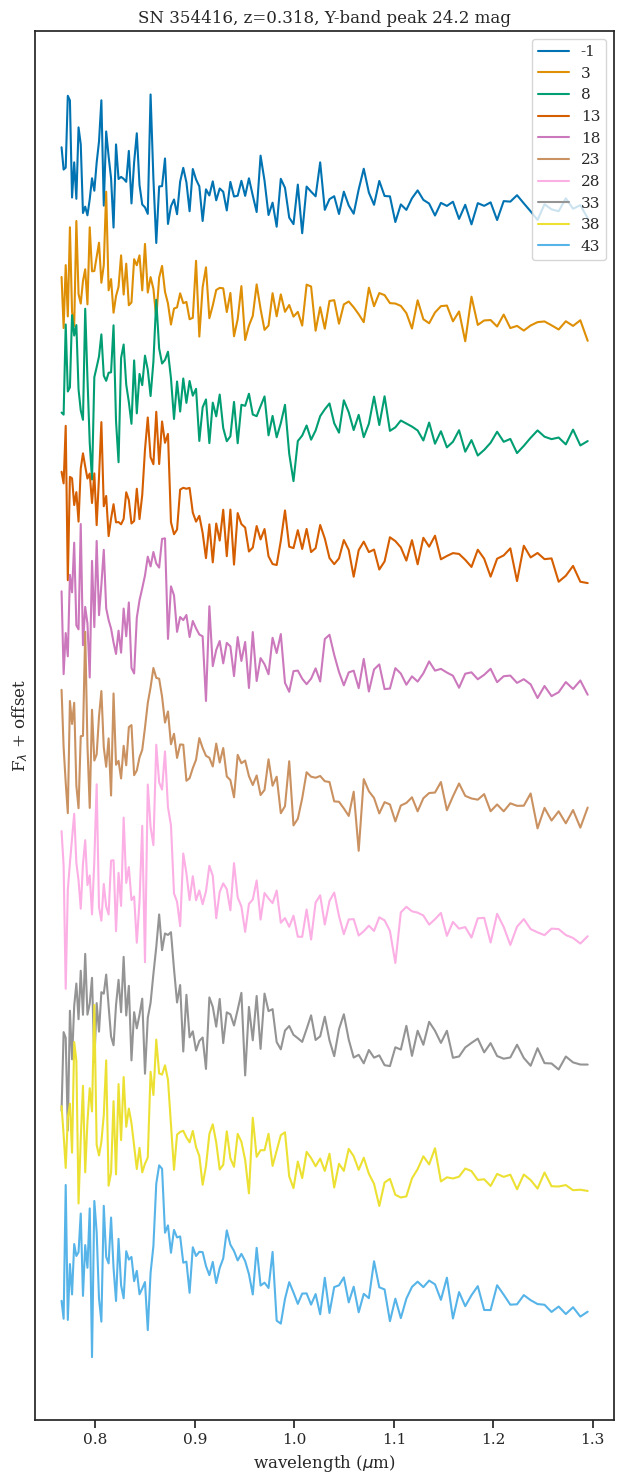

In [69]:
offset = 0 
fig, ax = plt.subplots(tight_layout=True)
fig.set_figheight(15)
start = start_position

for i, end in enumerate(end_positions):
    if i < 1:
        start = end + 1
        continue
    if i > 10:
        break
    
    wavelength = spec_hdus[cpu_number][2].data["LAMMIN"][start:end]
    if wavelength[-1] == -777:
        wavelength[-1] = np.nan
    
    flux = spec_hdus[cpu_number][2].data["FLAM"][start:end]
    if flux[-1] == -777:
        flux[-1] = np.nan

    ax.plot(wavelength[10:-20]/10_000, flux[10:-20] - offset, label=int(mjds[i] - target["SIM_PEAKMJD"]))
    
    offset += 1e-18
    start = end + 1

ax.set_xlabel("wavelength ($\mu$m)")
ax.set_ylabel("F$_{\lambda}$ + offset")
ax.get_yaxis().set_ticks([])
plt.legend()
plt.title(f'SN {target["SNID"].value[0].strip(" ")}, z={target["REDSHIFT_FINAL"].value[0]:.3f}, Y-band peak {target["SIM_PEAKMAG_Y"].value[0]:.1f} mag')
plt.savefig('spec-CCSN.pdf')